In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import re

In [21]:
df1 = pd.read_csv(r'E:\DataSets/labs.csv')
df2 = pd.read_csv(r'E:\DataSets/examination.csv')
df3 = pd.read_csv(r'E:\DataSets/demographic.csv')
df4 = pd.read_csv(r'E:\DataSets/diet.csv')
df5 = pd.read_csv(r'E:\DataSets/questionnaire.csv')

df2.drop(['SEQN'], axis = 1, inplace=True)
df3.drop(['SEQN'], axis = 1, inplace=True)
df4.drop(['SEQN'], axis = 1, inplace=True)
df5.drop(['SEQN'], axis = 1, inplace=True)

df = pd.concat([df1, df2], axis=1)
df = pd.concat([df, df3], axis=1)
df = pd.concat([df, df4], axis=1)
df = pd.concat([df, df5], axis=1)
df.shape

threshold = 0.6
df = df[df.columns[df.isnull().mean() < threshold]]


df.shape

df = df.rename(columns = {'SEQN' : 'ID',
                          'RIAGENDR' : 'Gender',
                          'DMDYRSUS' : 'Years_in_US', 
                          'INDFMPIR' : 'Family_income',
                          'LBXGH' : 'GlycoHemoglobin',
                          'BMXARMC' : 'ArmCircum',
                          'BMDAVSAD' : 'SaggitalAbdominal',
                          'MGDCGSZ' : 'GripStrength',
                          'DRABF' : 'Breast_fed'})

df = df.loc[:, ['ID', 'Gender', 'Years_in_US', 'Family_income','GlycoHemoglobin', 'ArmCircum', 
                'SaggitalAbdominal', 'GripStrength', 'Breast_fed']]

df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
0,73557.0,1,NaN,0.84,13.9,35.3,20.6,55.2,2.0
1,73558.0,1,NaN,1.78,9.1,34.7,24.4,61.5,2.0
2,73559.0,1,NaN,4.51,8.9,33.5,25.6,91.0,2.0
3,73560.0,1,NaN,2.52,NaN,21.0,14.9,32.2,2.0
4,73561.0,2,NaN,5.00,4.9,25.2,NaN,30.9,2.0
...,...,...,...,...,...,...,...,...,...
10170,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10171,NaN,2,NaN,1.95,NaN,NaN,NaN,NaN,NaN
10172,NaN,2,NaN,3.66,NaN,NaN,NaN,NaN,NaN
10173,NaN,1,NaN,1.05,NaN,NaN,NaN,NaN,NaN


In [22]:
df = df[df['ID'] != 0]
df['Years_in_US'] = df['Years_in_US'].apply(lambda x: x if x > 0 else 0)

df['GlycoHemoglobin'] = df['GlycoHemoglobin'].fillna(df['GlycoHemoglobin'].median())
df['SaggitalAbdominal'] = df['SaggitalAbdominal'].fillna(df['SaggitalAbdominal'].median())
df['ArmCircum'] = df['ArmCircum'].fillna(df['ArmCircum'].median())
df['GripStrength'] = df['GripStrength'].fillna(df['GripStrength'].median())

df['Family_income'] = df['Family_income'].fillna(df['Family_income'].median())

df['Breast_fed'] = df['Breast_fed'].fillna(value = 1)
df['Gender'] = df['Gender'].fillna(value = 1)

df=df.fillna(value=0)
df.round(decimals=2)
df

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
0,73557.0,1,0,0.840,13.9,35.3,20.6,55.2,2.0
1,73558.0,1,0,1.780,9.1,34.7,24.4,61.5,2.0
2,73559.0,1,0,4.510,8.9,33.5,25.6,91.0,2.0
3,73560.0,1,0,2.520,5.4,21.0,14.9,32.2,2.0
4,73561.0,2,0,5.000,4.9,25.2,20.7,30.9,2.0
...,...,...,...,...,...,...,...,...,...
10170,0.0,1,0,1.705,5.4,29.3,20.7,60.3,1.0
10171,0.0,2,0,1.950,5.4,29.3,20.7,60.3,1.0
10172,0.0,2,0,3.660,5.4,29.3,20.7,60.3,1.0
10173,0.0,1,0,1.050,5.4,29.3,20.7,60.3,1.0


In [23]:
df.describe()

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
count,10175.000000,10175.000000,10175.0,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000,10175.000000
mean,75846.591351,1.508305,0.0,2.209941,5.558359,28.555705,20.993710,62.378555,1.838034
std,14851.441452,0.499956,0.0,1.577340,0.820075,7.615724,4.185028,21.832815,0.368437
min,0.000000,1.000000,0.0,0.000000,3.500000,10.400000,10.100000,8.000000,1.000000
25%,75813.500000,1.000000,0.0,0.930000,5.300000,23.700000,18.700000,51.100000,2.000000
50%,78454.000000,2.000000,0.0,1.705000,5.400000,29.300000,20.700000,60.300000,2.000000
75%,81096.500000,2.000000,0.0,3.400000,5.600000,33.600000,22.800000,72.300000,2.000000
max,83731.000000,2.000000,0.0,5.000000,17.500000,59.400000,40.100000,162.800000,2.000000


In [24]:
df.loc[df['GlycoHemoglobin'] < 6.0, 'Diabetes'] = 0
df.loc[(df['GlycoHemoglobin'] >= 6.0) & (df['GlycoHemoglobin'] <= 6.4), 'Diabetes'] = 1
df.loc[df['GlycoHemoglobin'] >= 6.5, 'Diabetes'] = 2

df.head()

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,73557.0,1,0,0.84,13.9,35.3,20.6,55.2,2.0,2.0
1,73558.0,1,0,1.78,9.1,34.7,24.4,61.5,2.0,2.0
2,73559.0,1,0,4.51,8.9,33.5,25.6,91.0,2.0,2.0
3,73560.0,1,0,2.52,5.4,21.0,14.9,32.2,2.0,0.0
4,73561.0,2,0,5.00,4.9,25.2,20.7,30.9,2.0,0.0


Male patient of Diabetes  2.968058968058968 %
High risk of Diabetes in male  3.036855036855037 %
No Diabetes in male  43.16461916461917 %
Female patient of Diabetes  2.968058968058968 %
High risk of Diabetes in female  278 %
No Diabetes  45.13022113022113 %


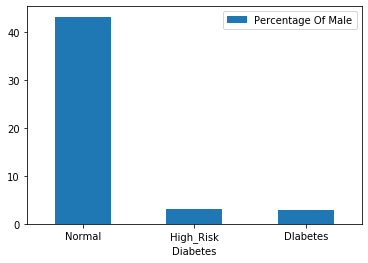

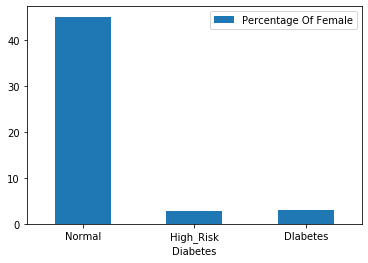

In [25]:
tcount=df.shape[0]
tcount
diaMale = df[(df.Gender == 1) & (df.Diabetes ==2)].shape[0]
tdiaMale=(diaMale/tcount)*100
print("Male patient of Diabetes ",tdiaMale,"%")

highRiskDiaMale = df[(df.Gender == 1) & (df.Diabetes ==1)].shape[0]
thighRiskDiaMale=(highRiskDiaMale/tcount)*100
print("High risk of Diabetes in male ",thighRiskDiaMale,"%")

normalMale = df[(df.Gender == 1) & (df.Diabetes ==0)].shape[0]
tnormalMale=(normalMale/tcount)*100
print("No Diabetes in male ",tnormalMale,"%")

diaFemale = df[(df.Gender == 2) & (df.Diabetes ==2)].shape[0]
tdiaFemale=(diaFemale/tcount)*100
print("Female patient of Diabetes ",tdiaFemale,"%")

highRiskDiaFemale = df[(df.Gender == 2) & (df.Diabetes ==1)].shape[0]
thighRiskDiaFemale=(highRiskDiaFemale/tcount)*100
print("High risk of Diabetes in female ",highRiskDiaFemale,"%")

normalFemale = df[(df.Gender == 2) & (df.Diabetes ==0)].shape[0]
tnormalFemale=(normalFemale/tcount)*100
print("No Diabetes ",tnormalFemale,"%")

df1 = pd.DataFrame({'Diabetes':['Normal', 'High_Risk', 'DIabetes'], 'Percentage Of Male':[tnormalMale, thighRiskDiaMale, tdiaMale]})
ax = df1.plot.bar(x='Diabetes', y='Percentage Of Male', rot=0)

df2 = pd.DataFrame({'Diabetes':['Normal', 'High_Risk', 'DIabetes'], 'Percentage Of Female':[tnormalFemale, thighRiskDiaFemale, tdiaFemale]})
ax = df2.plot.bar(x='Diabetes', y='Percentage Of Female', rot=0)

In [26]:
df.drop(['GlycoHemoglobin'], axis = 1, inplace=True)
df.drop(['ID'], axis = 1, inplace=True)
df

,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,1,0,0.840,35.3,20.6,55.2,2.0,2.0
1,1,0,1.780,34.7,24.4,61.5,2.0,2.0
2,1,0,4.510,33.5,25.6,91.0,2.0,2.0
3,1,0,2.520,21.0,14.9,32.2,2.0,0.0
4,2,0,5.000,25.2,20.7,30.9,2.0,0.0
...,...,...,...,...,...,...,...,...
10170,1,0,1.705,29.3,20.7,60.3,1.0,0.0
10171,2,0,1.950,29.3,20.7,60.3,1.0,0.0
10172,2,0,3.660,29.3,20.7,60.3,1.0,0.0
10173,1,0,1.050,29.3,20.7,60.3,1.0,0.0


In [27]:
X=df[df.columns[:-1]]
y=df[df.columns[-1]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25)
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape)
print(y_test.shape)

(7631, 7)
(2544, 7)
(7631,)
(2544,)


In [28]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=2) 
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test) 
  
from sklearn import metrics 
print("kNN model accuracy:", metrics.accuracy_score(y_test, y_pred)*100,"%") 

kNN model accuracy: 86.6745283018868 %
